# VARIABLE PRESELECTION

## IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcomplete
%config IPCompleter.greedy=True

## IMPORT DATA

Project root

In [6]:
root = '/content/drive/MyDrive/02_RETAIL'

Data files name

In [7]:
name_df = 'df_analytical_board.pickle'

Load data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_pickle(root + '/02_Data/03_Work/' + name_df)

In [ ]:
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,sales_maxm_6,sales_maxm_7,sales_maxm_8,sales_maxm_9,sales_maxm_10,sales_maxm_11,sales_maxm_12,sales_maxm_13,sales_maxm_14,sales_maxm_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


In [10]:
# sample_df = df.head(2000)
# sample_df

## SUPERVISED METHODS

### Prepare x e y

In [11]:
target = 'sales'
x = df.drop(columns = ['date','store_id','item_id','sales']).copy()
y =  df[target].copy()

### Mutual Information

#### Create a funtion to show result

In [12]:
def ranking_mi(mutual_selector, mode = 'table'):
    #Make up of ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importance_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importance_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Shows output
    if mode == 'table':
        return(ranking_mi)
    else:
        g = ranking_mi.importance_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importance_mi').variable)
        return(g)

#### Calculate and review

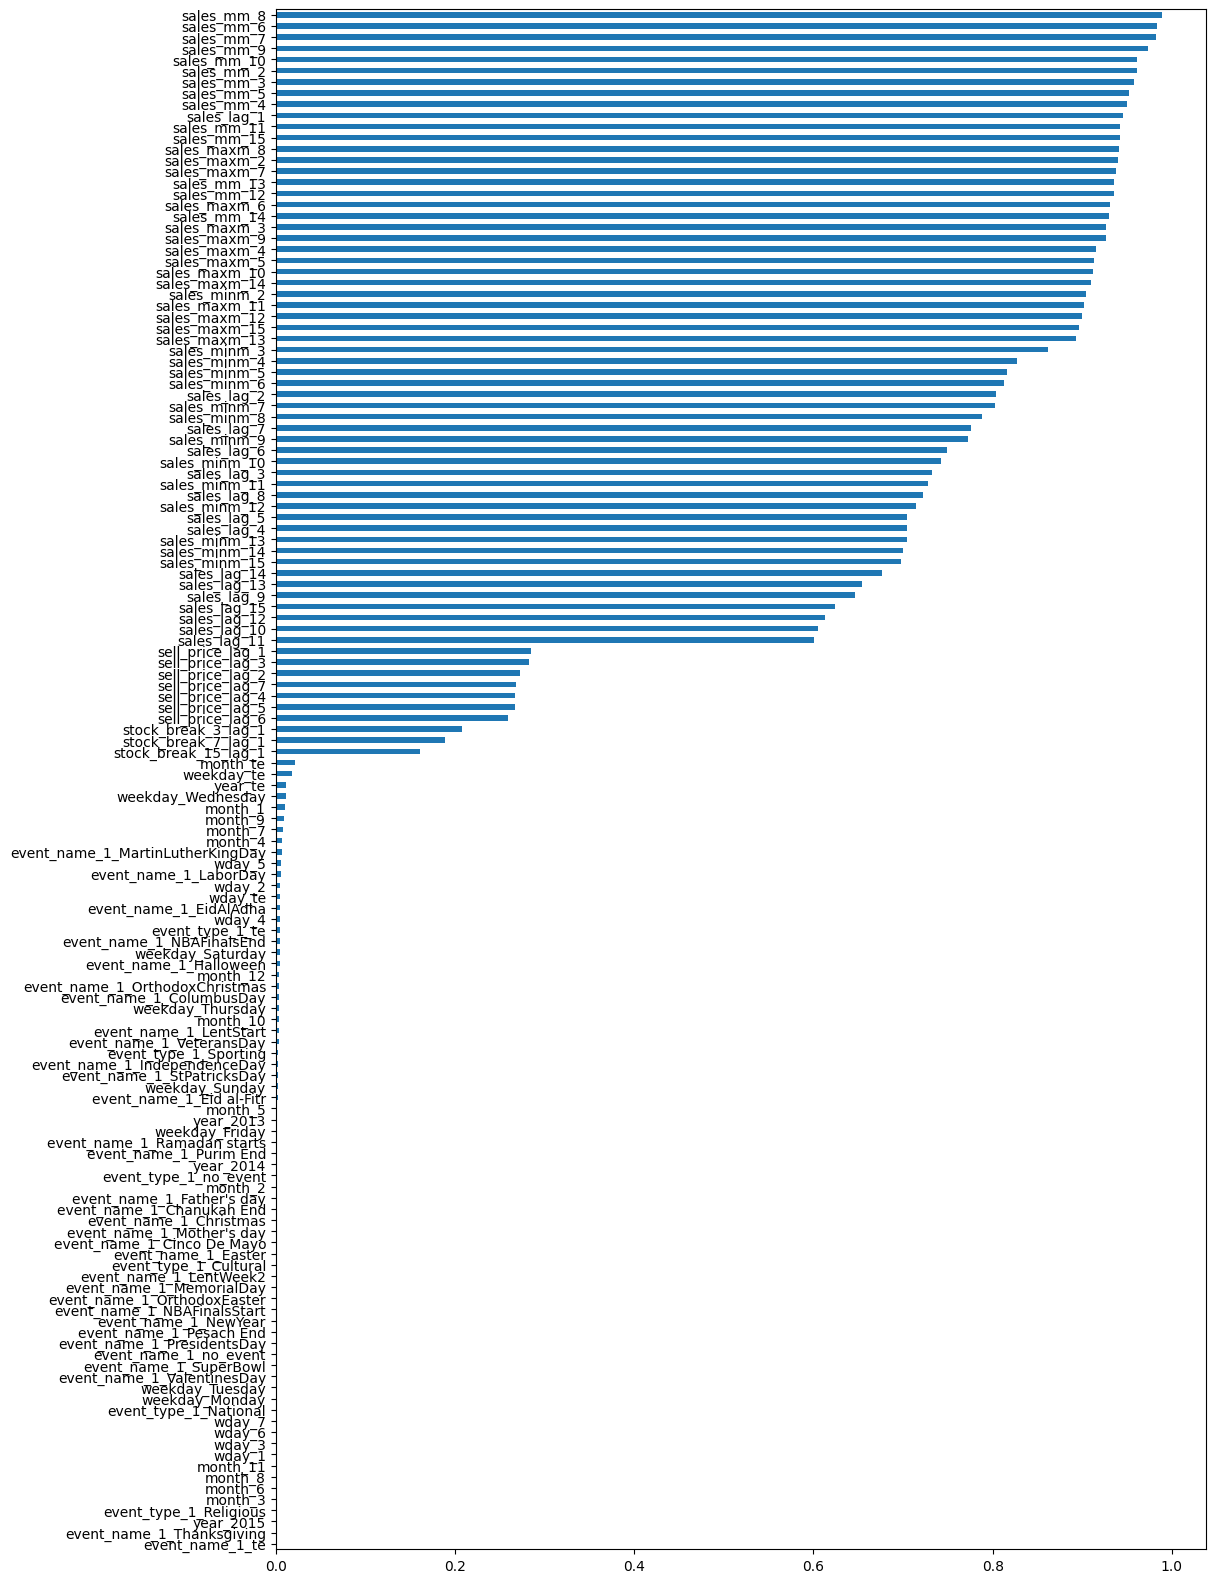

In [13]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, mode = 'graphic')

#### Select the variables that will pass

##### Define the position of the last variable we want to include

We look at the position of year2014.

In [14]:
ranking_mi(mutual_selector).reset_index().iloc[60:100]

,index,variable,importance_mi,ranking_mi
60,77,sell_price_lag_7,0.268310,60
61,74,sell_price_lag_4,0.267358,61
62,75,sell_price_lag_5,0.266781,62
63,76,sell_price_lag_6,0.259537,63
64,78,stock_break_3_lag_1,0.207392,64
65,79,stock_break_7_lag_1,0.188711,65
66,80,stock_break_15_lag_1,0.160500,66
67,66,month_te,0.021722,67
68,68,weekday_te,0.018021,68
69,65,year_te,0.011755,69


In [15]:
position_variable_limit = 72

##### Extract the name of the included ones

In [16]:
in_mi = ranking_mi(mutual_selector).iloc[0:position_variable_limit].variable

##### Create the dataframe with the selection

In [17]:
x_mi = x[in_mi].copy()

### Recursive Feature Elimination

#### Instantiate

In [ ]:
rfe = RFE(estimator = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae'))

#### Train

In [ ]:
rfe.fit(x,y)

##### Extract names that'll pass

In [ ]:
entran_rfe = x.columns[rfe.support_]

#### Create selection dataframe

In [ ]:
x_rfe = x[entran_rfe].copy()

In [ ]:
x_rfe

,year_2013,month_2,month_3,month_11,month_12,wday_1,wday_2,wday_4,event_name_1_Christmas,event_name_1_SuperBowl,...,ventas_maxm_5,ventas_maxm_6,ventas_maxm_7,ventas_maxm_8,ventas_maxm_9,ventas_maxm_10,ventas_maxm_11,ventas_maxm_13,ventas_maxm_14,ventas_maxm_15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,224.0,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0
20976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


### Permutation Importance

#### Create function to show the result

In [ ]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instantiate and train

In [ ]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae')

xgb.fit(x,y)

permutacion = permutation_importance(xgb,
                                     x, y,
                                     scoring = 'neg_mean_absolute_percentage_error',
                                     n_repeats=3, n_jobs = -1)

C:\Users\isaac\miniconda3\envs\retail\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Check output

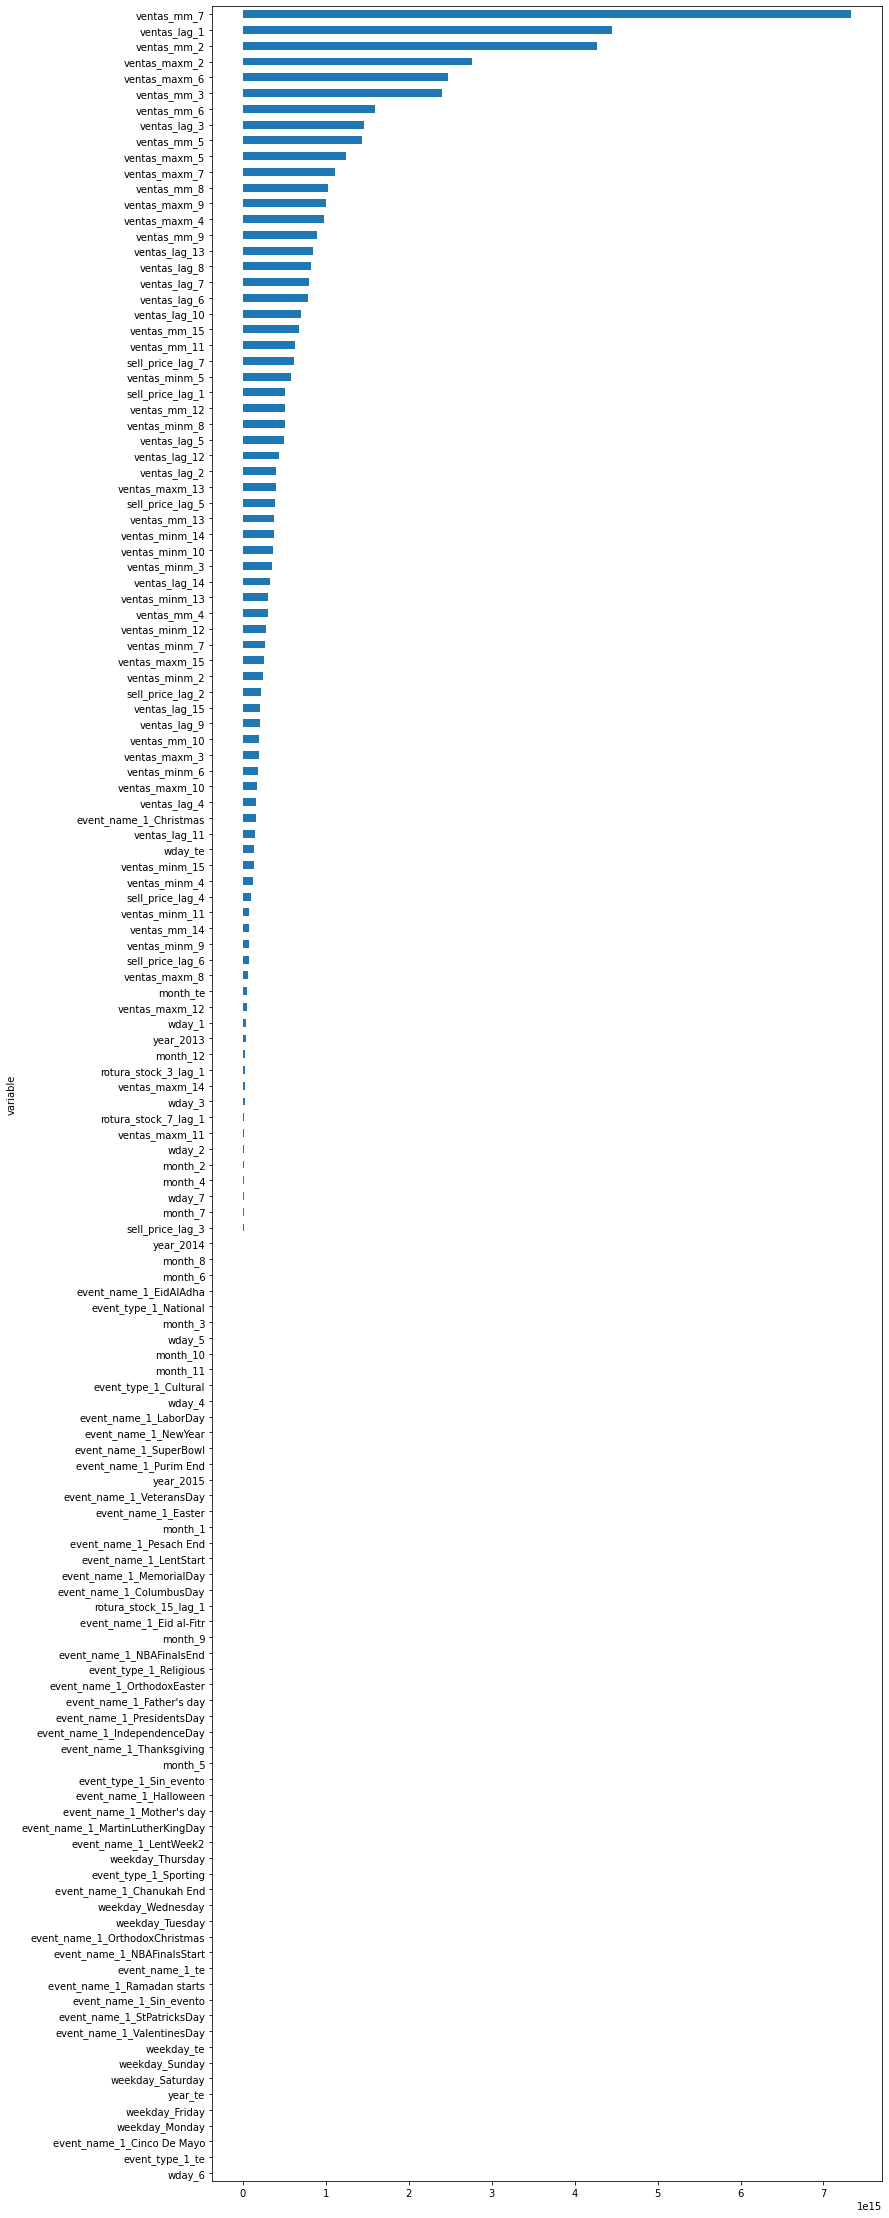

In [ ]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,40));

#### Select variables that will pass

##### Define position of last variable that'll pass

Check wday3 position.

In [ ]:
rank_per.reset_index().iloc[50:100]

,index,variable,importancia_per,ranking_per
50,84,ventas_lag_4,1.628127e+14,50
51,30,event_name_1_Christmas,1.594072e+14,51
52,91,ventas_lag_11,1.448014e+14,52
53,67,wday_te,1.306858e+14,53
54,109,ventas_minm_15,1.288004e+14,54
55,98,ventas_minm_4,1.259464e+14,55
56,74,sell_price_lag_4,9.425293e+13,56
57,105,ventas_minm_11,7.617801e+13,57
58,122,ventas_mm_14,7.546715e+13,58
59,103,ventas_minm_9,7.159433e+13,59


In [ ]:
posicion_variable_limite = 69

##### Extract names of chosen ones

In [ ]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Create selection dataframe

In [ ]:
x_per = x[entran_per].copy()

## SELECT FINAL METHOD

In [18]:
x_preselected = x_mi
#x_preseleccionado = x_rfe
#x_preseleccionado = x_per

## UNSUPERVISED METHOD

In this case we do not, since there are already many variables and we are going to model with tree algorithms.

## INCORPORATION OF SEGMENTATION VARIABLES

Let's add the segmentation variables that we'll need as well.

In [19]:
x_preselected = pd.concat([df[['date','store_id','item_id']], x_preselected], axis=1)

## SAVE DATASETS

In [20]:
#Definir los nombres de los archivos
name_x_preselected = root + '/02_Data/03_Work/' + 'x_preselected.pickle'
name_y_preselected = root + '/02_Data/03_Work/' + 'y_preselected.pickle'

In [21]:
#Save the files
x_preselected.to_pickle(name_x_preselected)

y_preselected = y.copy()
y_preselected.to_pickle(name_y_preselected)

In [22]:
#Save the names of the final variables
final_variables_names = root + '/05_Results/' + 'final_variables.pickle'

x_preselected.iloc[0].to_pickle(final_variables_names)